In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import configparser

In [5]:
config = configparser.ConfigParser()
config.read("../config\config.ini")
db_config = config["mysql"]

# Create connection to DB

    Note: The errors indicate that pandas does not directly support the DBAPI I am currently using with the read_sql function. Instead, it suggests using SQLAlchemy for better compatibility. However, for our current task, you can ignore these errors as they do not impact our workflow.

In [88]:
conn = mysql.connector.connect(
        host=db_config["host"], user=db_config["user"],database=db_config["database"] ,password=db_config["password"]
    )
cursor = conn.cursor()

query = "SELECT * FROM logs"
df = pd.read_sql(query, conn)

cursor.close()
conn.close()

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_19004\235707032.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [89]:
df.head()

,id,IP_Address,Timestamp,Request_Method,URL,Status_Code,Response_Size,Query_Parameters
0,1,74.240.191.221,2024-06-25 00:06:22,DELETE,/index.html?product_id=585&user_id=218,200,1974,product_id=585&user_id=218
1,2,15.89.35.67,2024-06-24 04:43:22,PUT,/index.html?session_id=def456&session_id=mno34...,301,4349,session_id=def456&session_id=mno345&user_id=709
2,3,158.20.204.46,2024-06-21 14:54:22,GET,/contact.html?session_id=def456,200,4060,session_id=def456
3,4,238.189.173.32,2024-06-21 21:33:22,GET,/signup?session_id=abc123&session_id=ghi789,500,2661,session_id=abc123&session_id=ghi789
4,5,190.111.164.7,2024-06-26 09:03:22,GET,/products.html?session_id=mno345&user_id=483,302,629,session_id=mno345&user_id=483


# Descriptive Statistics

In [90]:
df.describe()

,id,Timestamp,Status_Code,Response_Size
count,1000.000000,1000,1000.00000,1000.000000
mean,500.500000,2024-06-23 09:20:53.319999744,336.36200,2291.119000
min,1.000000,2024-06-19 18:48:22,200.00000,0.000000
25%,250.750000,2024-06-21 13:57:52,301.00000,734.000000
50%,500.500000,2024-06-23 10:14:22,302.00000,2517.000000
75%,750.250000,2024-06-25 05:11:52,404.00000,3432.000000
max,1000.000000,2024-06-26 17:24:22,500.00000,4918.000000
std,288.819436,NaN,102.67412,1436.089726


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1000 non-null   int64         
 1   IP_Address        1000 non-null   object        
 2   Timestamp         1000 non-null   datetime64[ns]
 3   Request_Method    1000 non-null   object        
 4   URL               1000 non-null   object        
 5   Status_Code       1000 non-null   int64         
 6   Response_Size     1000 non-null   int64         
 7   Query_Parameters  1000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 62.6+ KB


# Count of requests by IP address
    Here we have the request counts for each IP address and the graphical representation of the top ten requests per IP address.

In [92]:
df['IP_Address'].value_counts()

IP_Address
NULL               51
244.113.20.63      27
75.108.179.75      27
86.238.237.49      27
240.57.228.32      26
151.80.55.55       24
196.224.137.79     24
141.199.38.146     24
13.224.24.185      23
20.15.123.111      23
86.144.221.240     23
134.207.168.109    23
147.77.212.177     22
153.1.47.251       22
127.132.184.75     22
93.228.77.196      21
74.240.191.221     21
15.89.35.67        21
158.20.204.46      20
190.111.164.7      20
15.189.100.115     20
149.43.222.103     20
167.53.66.101      20
129.173.76.59      20
72.81.114.166      20
250.58.233.174     20
101.137.132.71     20
224.15.134.151     19
95.191.225.234     19
188.128.112.159    19
153.6.128.136      18
77.25.133.33       18
248.187.87.40      17
57.179.44.69       17
55.192.232.116     17
160.229.223.17     17
62.82.168.113      16
238.189.173.32     16
46.189.5.214       16
89.222.139.151     16
63.113.225.225     15
35.239.32.150      15
226.49.186.58      14
49.90.99.244       14
90.154.68.175      14

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_19004\730973140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ip_counts.values, y=ip_counts.index, palette='viridis')


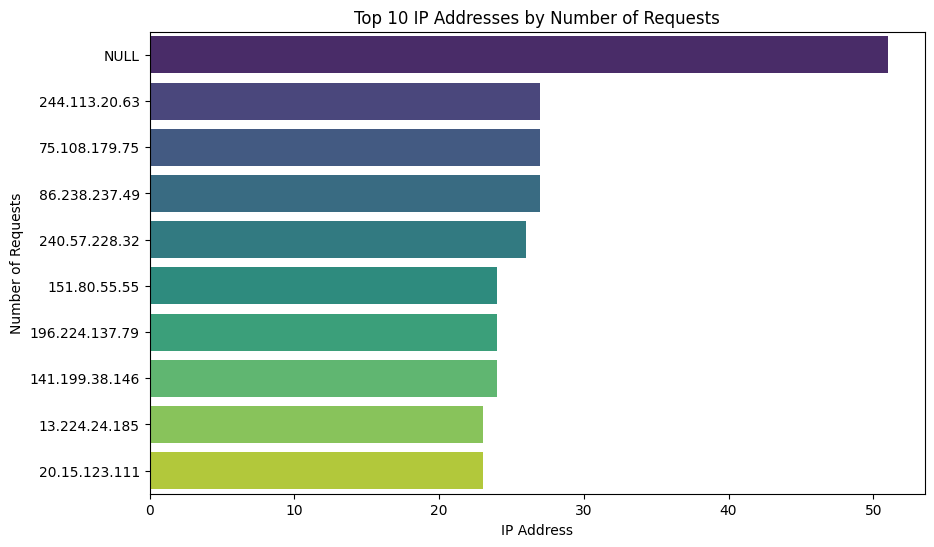

In [93]:
ip_counts = df['IP_Address'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=ip_counts.values, y=ip_counts.index, palette='viridis')
plt.xlabel('IP Address')
plt.ylabel('Number of Requests')
plt.title('Top 10 IP Addresses by Number of Requests')
plt.show()


# Plot the number of requests per status code

In [94]:
df["Status_Code"].value_counts()

Status_Code
200    219
302    211
301    192
500    191
404    187
Name: count, dtype: int64

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_19004\3622813220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_code_counts.index,y=status_code_counts.values,palette="husl")


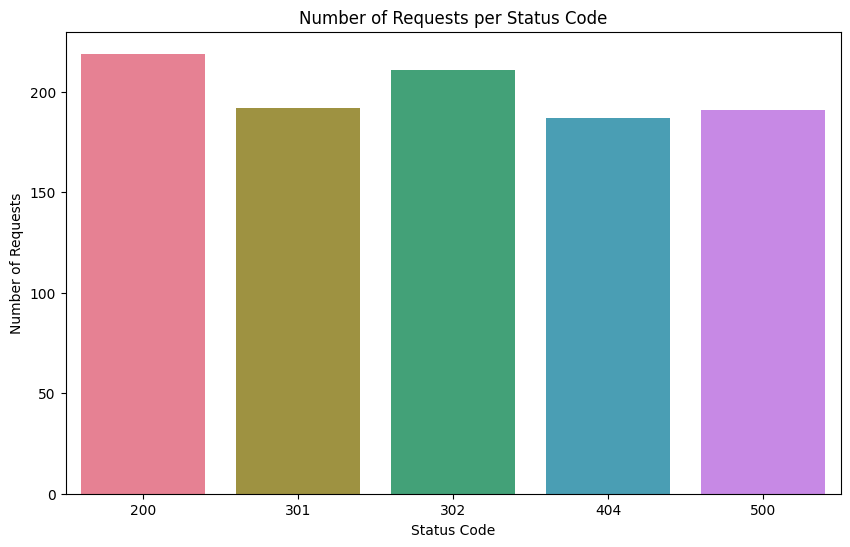

In [95]:
status_code_counts = df["Status_Code"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=status_code_counts.index,y=status_code_counts.values,palette="husl")
plt.title('Number of Requests per Status Code')
plt.xlabel('Status Code')
plt.ylabel('Number of Requests')
plt.show()

# Plot the number of requests per method

In [96]:
df["Request_Method"].value_counts()

Request_Method
PUT       267
DELETE    261
GET       239
POST      233
Name: count, dtype: int64

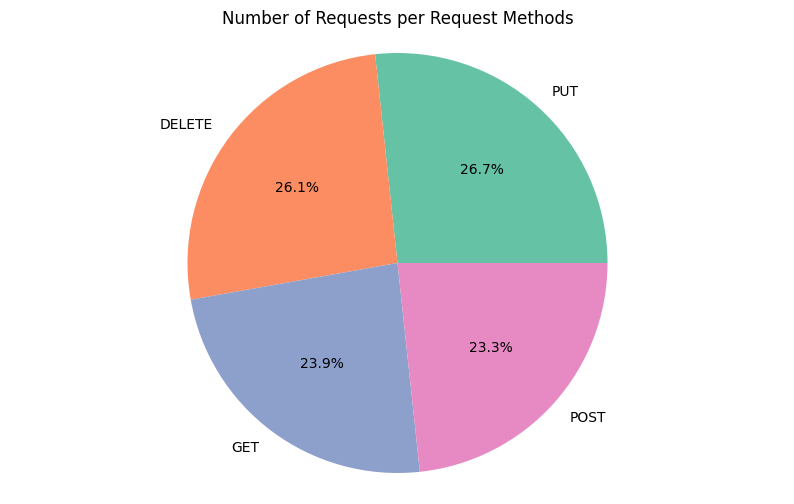

In [97]:
method_counts = df["Request_Method"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(method_counts, labels=method_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Number of Requests per Request Methods')
plt.axis('equal')
plt.show()

# Plot the number of requests per query parameters
    Here we can see the most request based on query parameters.

In [98]:
df["Query_Parameters"].value_counts().head(15)

Query_Parameters
category=fashion                      23
session_id=abc123                     21
session_id=ghi789                     19
session_id=mno345                     18
category=home                         18
session_id=def456                     16
category=books                        15
category=electronics                  15
session_id=jkl012                     11
category=toys                          7
category=books&category=toys           3
session_id=mno345&category=toys        3
category=home&session_id=mno345        3
session_id=jkl012&category=books       3
category=fashion&session_id=def456     3
Name: count, dtype: int64

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_19004\924351064.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=query_param_counts.index, y= query_param_counts.values,palette="Paired")


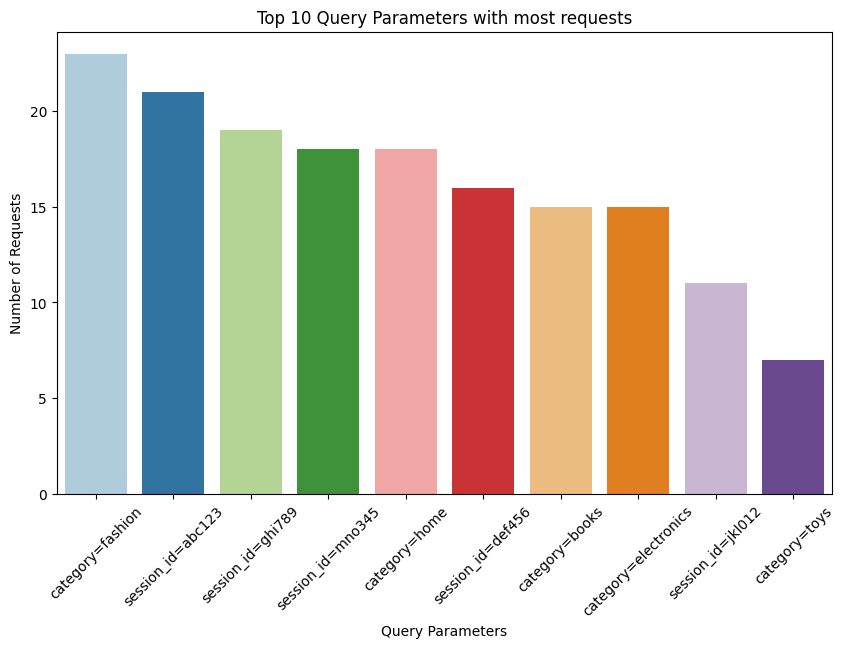

In [104]:
query_param_counts = df["Query_Parameters"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=query_param_counts.index, y= query_param_counts.values,palette="Paired")
plt.title('Top 10 Query Parameters with most requests')
plt.xlabel('Query Parameters')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()

# Plot the number of requests over time

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_19004\2596767268.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df.set_index('Timestamp').resample('H').size().plot()


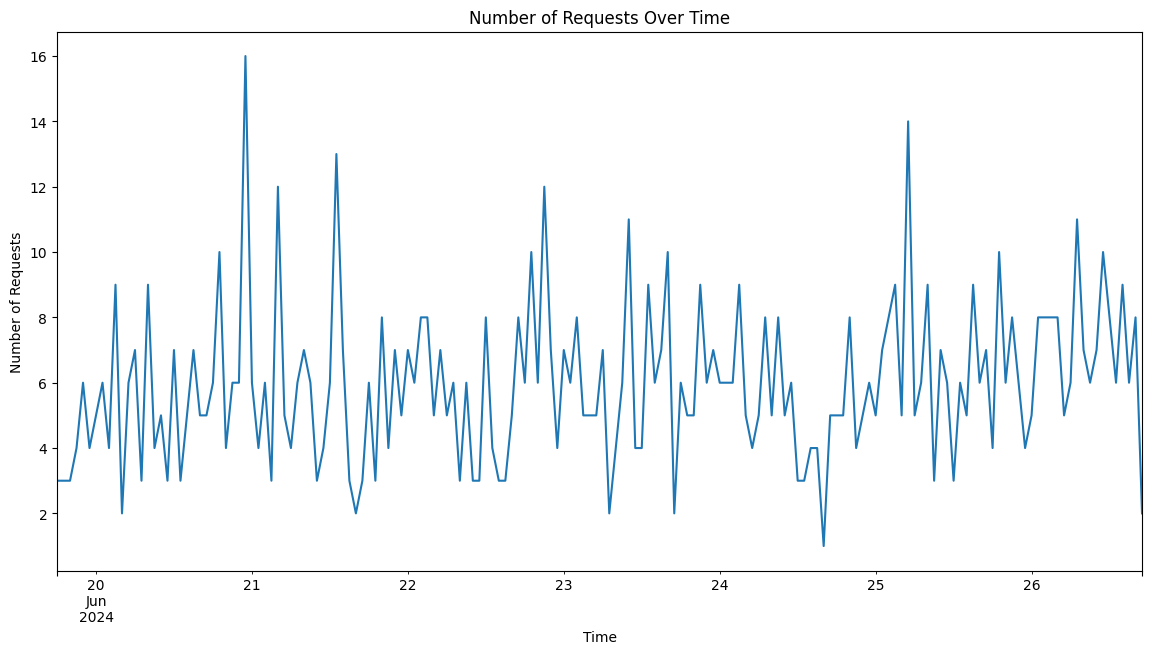

In [100]:
plt.figure(figsize=(14, 7))
df.set_index('Timestamp').resample('H').size().plot()
plt.title('Number of Requests Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Requests')
plt.show()

- Now, let's see how it looks from a daily perspective.

In [101]:
df["date"] = df["Timestamp"].dt.date.values

In [102]:
date_requests = df["date"].value_counts()
date_requests

date
2024-06-25    158
2024-06-23    146
2024-06-22    143
2024-06-20    143
2024-06-21    133
2024-06-26    128
2024-06-24    126
2024-06-19     23
Name: count, dtype: int64

C:\Users\Ehsan\AppData\Local\Temp\ipykernel_19004\2003315534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=date_requests.values, y=date_requests.index, palette='Set2')


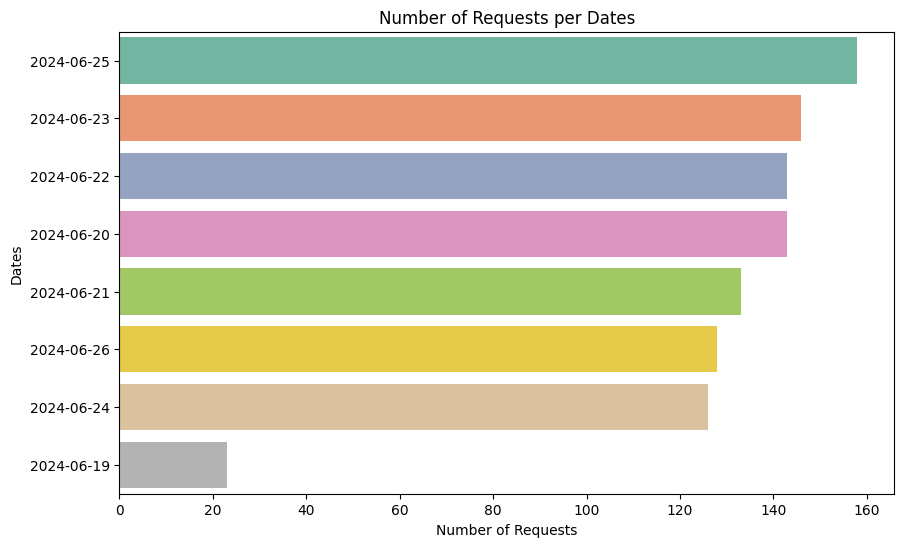

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x=date_requests.values, y=date_requests.index, palette='Set2')
plt.xlabel('Number of Requests')
plt.ylabel('Dates')
plt.title('Number of Requests per Dates')
plt.show()
